# Bank Customer Arrival Simulation Modeling

In this notebook, a simple bank customer arrival model is presented. We will use Poisson distribution to model the arrival and departure times.

#### Download necessary libraries

In [1]:
!pip install pandas
!pip install matplotlib
!pip install scipy

#### Import necessary libraries

In [1]:
import random
import itertools
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import collections  as mc

%matplotlib inline

## Simulation Parameters
Define the parameters used to simulate user data.

#### Define poisson variables
Define the parameters of the Poisson distribution for customers arriving and departing.

In [2]:
lambd_in = 0.5
lambd_out = 0.4

#### Define System Parameters

In [3]:
#bank variables
closing_time =  100      #initialize the bank closing time 
overtime = 0             #overtime the employees need to be paid for
    
#queue variables
num_arrivals = 0    #number of people in the que
num_departures = 0  #number of people who have been served
n = 0               #length of the queue  
max_line_length = 0 #the maximum length of the waiting line: 
    
#time variables
t = 0                                       #set the time of first arrival to 0
time_depart = float('inf')                  #set the first time of departure to infinity
time_arrive = random.expovariate(lambd_in)  #generate the first arrival

## Distribution Plots

#### Plot customer arrival distribution

Text(0.5,1,'Customer Arrival Poisson Distribution w/ lambda=0.5')

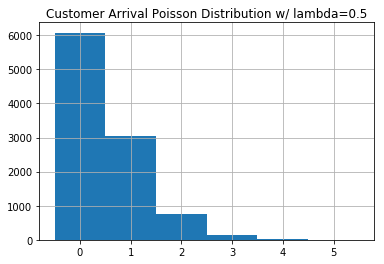

In [4]:
arrival_dist = stats.poisson.rvs(
                    size=10000,  
                    mu=lambd_in,
)
pd.DataFrame(arrival_dist).hist(range=(-0.5,max(arrival_dist)+0.5),
                                   bins=max(arrival_dist)+1)

plt.title('Customer Arrival Poisson Distribution w/ lambda=0.5')

#### Plot customer deparature distribution

Text(0.5,1,'Customer Departure Poisson Distribution w/ lambda=0.4')

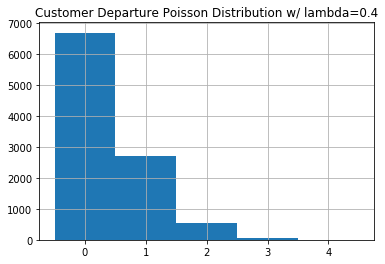

In [5]:
departure_dist = stats.poisson.rvs(
                    size=10000,  
                    mu=lambd_out         
)
pd.DataFrame(departure_dist).hist(range=(-0.5,max(departure_dist)+0.5),
                                   bins=max(departure_dist)+1)

plt.title('Customer Departure Poisson Distribution w/ lambda=0.4')

## Simulation

Create two empty arrays to keep track of the customers who arrive, and who depart:

In [6]:
departures = []
arrivals = []

We simulate the arrivals and departures in a bank branch using a while loop

In [7]:
while t < closing_time or n >= 0:
        
        # case 1 - within business hours, a customer arrives before any customer leaves the queue 
        if time_arrive <= time_depart and time_arrive <= closing_time:
            
            t = time_arrive      # move time along to the time of the new arrival
            num_arrivals += 1    # increase the number of customers with the additional arrival
            n += 1               # we have an additional customer, increase the size of the waiting line by 1 
            
            # generate time of next arrival
            time_arrive = random.expovariate(lambd_in) + t
            
            #append the new customer to the arrival list
            arrivals.append(t)
            print("Arrival ", num_arrivals, "at time ", t)
            
            
            # generate time of departure 
            if n == 1:
                Y = random.expovariate(lambd_out)
                time_depart = t + Y
                
            ''' 
            print('Arrivals', arrivals)
            print('Departures', departures)
            '''       
                  
        # case 2 - within business hours, a customer departs before the next arrival
        elif time_depart < time_arrive and time_depart <= closing_time:
            
            # advance time to the next departure time
            t = time_depart
            
            # one more person served -> increase the count of clients who have been served
            num_departures += 1
            
            #update the departure list
            departures.append(t)
            print("Departure ", num_departures, "at time ", t)
            
            # one less person in line -> decrease the size of the waiting line
            n -= 1
            
            # if the queue is empt -> set the time of the next departure to infinity
            if n == 0:
                time_depart = float('inf')
                
            # if the queue isn't empty, generate the next time of departure
            else:
                Y = random.expovariate(lambd_out)
                time_depart = t + Y
            
            ''' 
            print('Arrivals', arrivals)
            print('Departures', departures)    
            ''' 
                  
        # case 3 - next arrival/departure happens after closing time and there are people still in the queue
        elif min(time_arrive, time_depart) > closing_time and n > 0:
            
            # advance time to next departure
            t = time_depart
            
            #update the departure list
            departures.append(t)
            
            #update the number of departures/clients served
            num_departures += 1     # one more person served
            
            print("Departure ", num_departures, "at time ", t)
            
            #update the queue
            n -= 1    # one less person in the waiting line
            
            
            # if line isn't empty, generate the time of the next departure
            if n > 0:
                Y = random.expovariate(lambd_out)
                time_depart = t + Y
            
            ''' 
            print('Arrivals', arrivals)
            print('Departures', departures) 
            ''' 
            
            
        # case 4 - next arrival/departure happens after closing time and there is nobody left in the queue
        elif min(time_arrive, time_depart) > closing_time and n == 0:
            
            # calculate overtime
            overtime = max(t - closing_time, 0)
            print('Overtime = ', overtime)
            
            '''
            print('Arrivals', arrivals)
            print('Departures', departures)
            '''
                      
            break

Arrival  1 at time  0.733296490029948
Arrival  2 at time  3.648173712202563
Arrival  3 at time  4.140127705901769
Arrival  4 at time  4.416501553018321
Arrival  5 at time  4.6550054306912205
Arrival  6 at time  5.174142265880513
Arrival  7 at time  6.759724722689841
Arrival  8 at time  7.395942875233711
Departure  1 at time  7.443190283970995
Arrival  9 at time  8.204146467792725
Arrival  10 at time  8.935351934310301
Departure  2 at time  9.66275765091389
Arrival  11 at time  10.312080719279901
Departure  3 at time  11.427653216357287
Arrival  12 at time  11.6558223093472
Departure  4 at time  12.127844354420656
Arrival  13 at time  12.595867658513043
Arrival  14 at time  13.17327406074116
Arrival  15 at time  13.493691303777982
Departure  5 at time  16.036377028217405
Departure  6 at time  16.9300586550363
Departure  7 at time  17.82191078573947
Arrival  16 at time  17.905574282651855
Departure  8 at time  18.181228832484155
Arrival  17 at time  18.780845236232413
Arrival  18 at time

## Plot Output of Simulation

#### Generate the list of line collections and corresponding colors
We first find all binary combination of colors. We then go through both the `arrivals` and `departures` lists that we created above to create a line element for each customer.

In [8]:
# Get all combination of colors
all_colors = list(itertools.product([0, 1], repeat=4))

lines = []
colors = []
color_idx = 0
for i in range(len(arrivals)):
    if color_idx >= len(all_colors):
        color_idx = 0
    
    line= [(arrivals[i],i),(departures[i],i)]
    
    lines.append(line)
    colors.append(all_colors[color_idx])
    color_idx+=1

#### Plot results

Text(0.5,1,'Bank Customer Arrival/Departure Simulation Model')

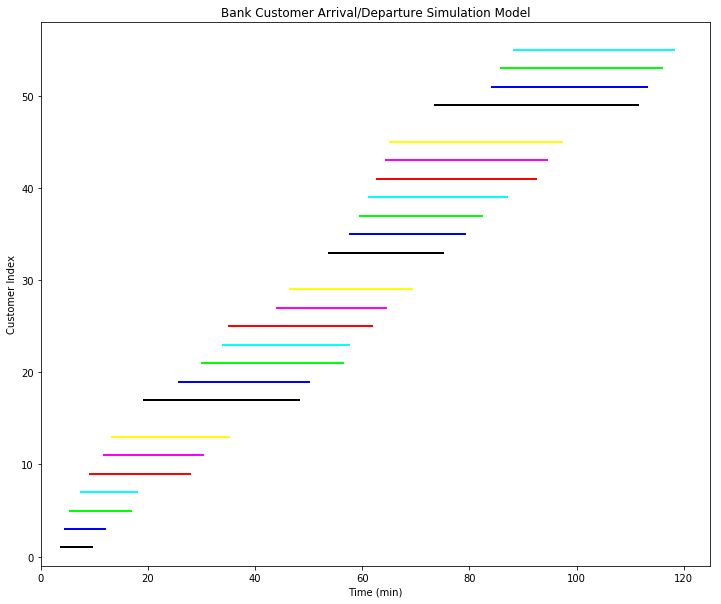

In [9]:
lc = mc.LineCollection(lines, colors=colors, linewidths=2)
fig, ax = plt.subplots(figsize=(12,10))
ax.add_collection(lc)
ax.set_xlim((0,departures[-1]+5))
ax.set_ylim((-1,len(departures)+1))
ax.set_xlabel("Time (min)")
ax.set_ylabel("Customer Index")
ax.set_title("Bank Customer Arrival/Departure Simulation Model")

From here, it is seen that customers that arrive early spend very little time in the bank, and the customers that arrive late spend much longer in the bank. This is per the Poisson distribution defined above. You can manipulate that to change the results of this simulation.